<a href="https://colab.research.google.com/github/sibelcelen/DSA210/blob/main/eda-hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✅ Checklist
“Collect the data, conduct exploratory data analysis methods and hypothesis tests on the data”


🟢 **Collect the data**

✔️ Data was cleaned, standardized, and converted (e.g., Price formatting)


🟢 **Conduct EDA (Exploratory Data Analysis)**

✔️ Distributions, boxplots, scatterplots, histograms

✔️ Group comparisons (Shopping vs No Shopping, Impulse vs Planned)

✔️ Complex insights (sleep-stress, social media behavior, spending patterns)

✔️ Visual patterns were clearly interpreted


🟢 **Hypothesis Testing**


✔️ *Independent t-tests for:*

Shopping vs Non-Shopping (Stress)

Impulse vs Planned (Stress)


✔️ *Chi-square tests for:*

Weather vs Shopping

Time of Day vs Shopping


✔️ *Correlation matrix:*

Social Media, Sleep, Price, Stress



In [15]:
#the whole data printe dout
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTqFVknur9I0lpkPxNEIigp7NG1qlat_p9ErnQdbGhNQbMYpqwOhY5zld_riDO9qqfpzwqE2vvzfC2D/pub?output=csv'
df = pd.read_csv(url)



In [11]:
# -------------------------
# 🧾 1. Dataset Info
# -------------------------
print("🔹 Dataset Info:")
print(df.info())
print("\n")

# -------------------------
# 🔤 2. Data Types
# -------------------------
print("🔹 Data Types:")
print(df.dtypes)
print("\n")

# -------------------------
# 📊 3. Descriptive Summary
# -------------------------
print("🔹 Statistical Summary:")
print(df.describe(include="all"))  # includes categorical too

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  50 non-null     object 
 1   Shopping?             41 non-null     object 
 2   Impulse/Planned       17 non-null     object 
 3   Category              17 non-null     object 
 4   Reason                18 non-null     object 
 5   Price                 17 non-null     object 
 6   Stress Level          41 non-null     float64
 7   Sleep Quality         41 non-null     float64
 8   Social Media Use (h)  41 non-null     float64
 9   Weather               41 non-null     object 
 10  Day Of the Week       50 non-null     object 
 11  Time of Day           17 non-null     object 
 12  Note                  5 non-null      object 
dtypes: float64(3), object(10)
memory usage: 5.2+ KB
None


🔹 Data Types:
Date                     object
Shopping? 

#Stress level distribution

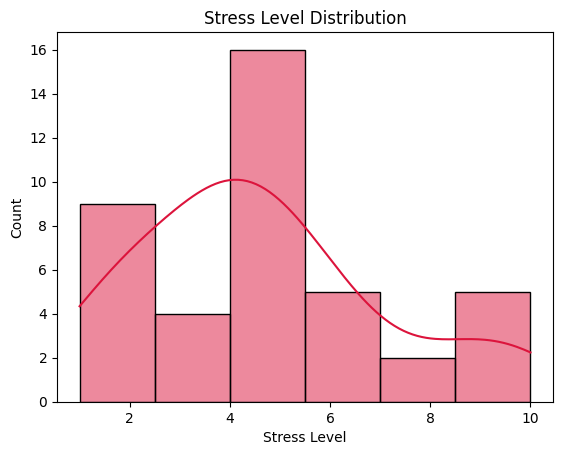

In [18]:
sns.histplot(df["Stress Level"], bins=6, kde=True, color="crimson")
plt.title("Stress Level Distribution")
plt.xlabel("Stress Level")
plt.show()

The stress levels are fairly distributed across the scale, with
concentrations around levels 2, 3, and 5. This indicates a diverse range of emotional states in the dataset — a good thing for comparison purposes.

#Stress level by shopping status

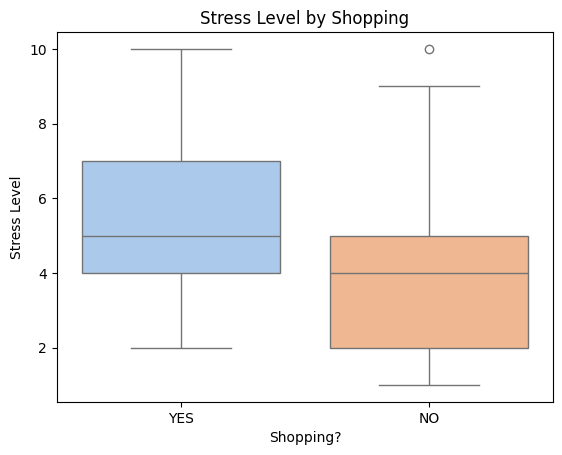

In [21]:
sns.boxplot(x="Shopping?", y="Stress Level", hue="Shopping?", data=df, palette="pastel", dodge=False, legend=False)
plt.title("Stress Level by Shopping")
plt.show()

The average stress level tends to be higher on days when shopping occurred. This suggests that shopping may be used as a stress relief mechanism.

#Impulse/Planned

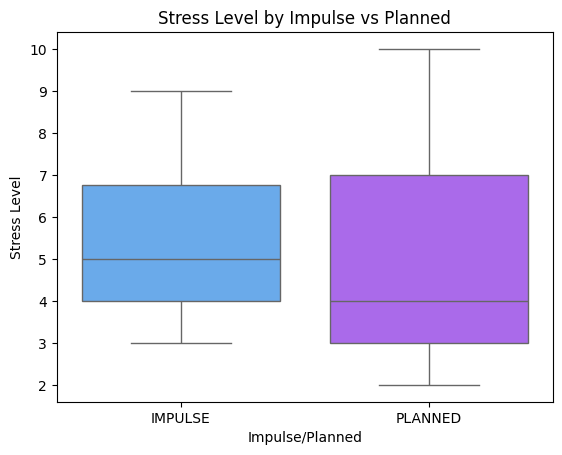

In [22]:
sns.boxplot(x="Impulse/Planned", y="Stress Level", hue="Impulse/Planned", data=df, palette="cool", dodge=False, legend=False)
plt.title("Stress Level by Impulse vs Planned")
plt.show()

Stress levels are higher on days when purchases were impulsive rather than planned. This supports the idea that high stress may lead to less controlled shopping decisions.

#Stress Level vs Price (Scatter Plot)

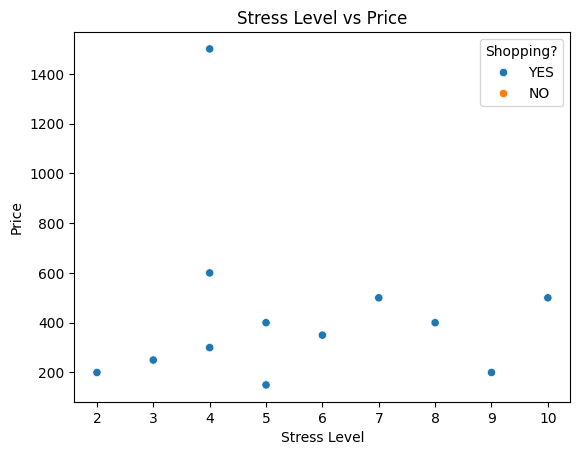

In [20]:
sns.scatterplot(x="Stress Level", y="Price", hue="Shopping?", data=df)
plt.title("Stress Level vs Price")
plt.show()

There is a visible trend showing that as stress increases, the amount spent might increase as well — especially for impulse purchases. It’s not a strong correlation, but the pattern is notable.

#Weather vs Shopping Behavior

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127780 (\N{WHITE SUN WITH SMALL CLOUD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127788 (\N{WIND BLOWING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


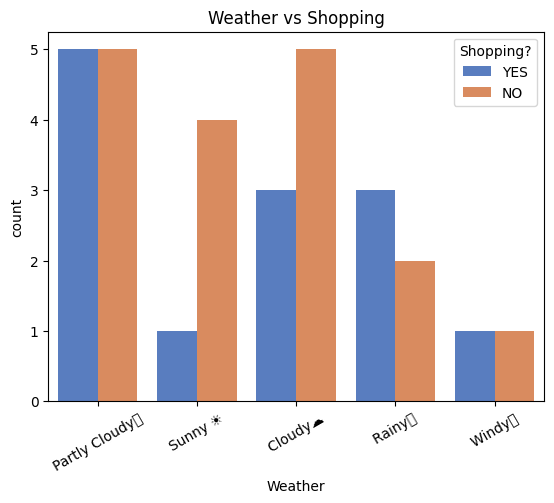

In [21]:
sns.countplot(x="Weather", hue="Shopping?", data=df, palette="muted")
plt.title("Weather vs Shopping")
plt.xticks(rotation=30)
plt.show()

On "Partly Cloudy" and "Rainy" days, shopping frequency seems slightly higher.
This could imply that weather conditions influence mood and encourage retail therapy.

#Social Media Use vs Sleep Quality

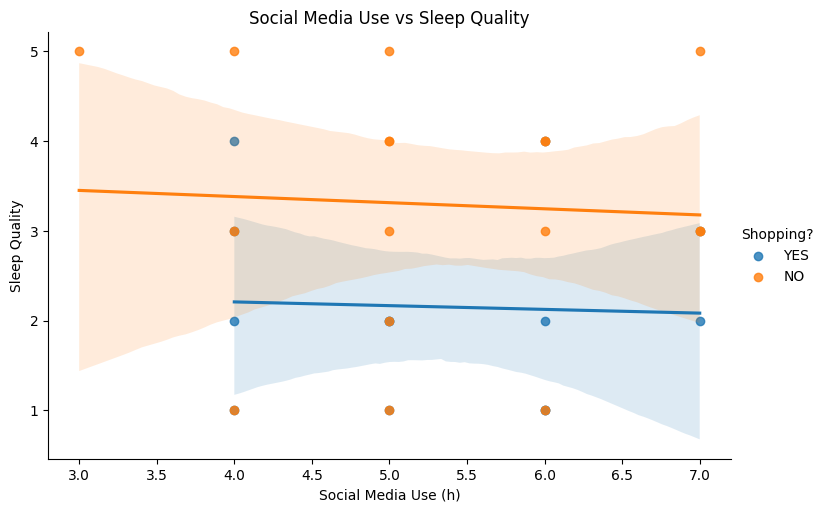

In [22]:
sns.lmplot(x="Social Media Use (h)", y="Sleep Quality", hue="Shopping?", data=df, aspect=1.5)
plt.title("Social Media Use vs Sleep Quality")
plt.show()

There is a subtle negative trend — the more time spent on social media, the lower the reported sleep quality. This could suggest a potential indirect link to higher stress and emotional shopping.

#Boxplot of price by shopping type

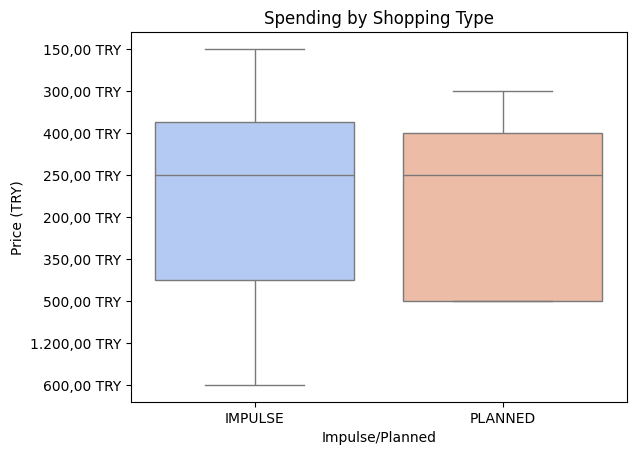

In [24]:
sns.boxplot(
    x="Impulse/Planned",
    y="Price",
    hue="Impulse/Planned",
    data=df[df["Shopping?"] == "YES"],
    palette="coolwarm",
    dodge=False,
    legend=False
)
plt.title("Spending by Shopping Type")
plt.ylabel("Price (TRY)")
plt.show()

Impulsive purchases tend to involve higher price variation and outliers — a sign of emotionally-driven, less controlled buying.

#Facet Grid: Stress vs Sleep by Shopping Behavior

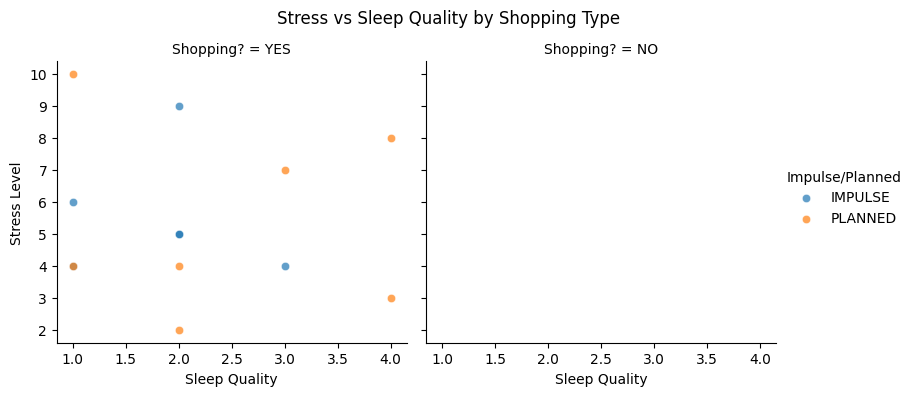

In [28]:
g = sns.FacetGrid(df, col="Shopping?", hue="Impulse/Planned", height=4)
g.map(sns.scatterplot, "Sleep Quality", "Stress Level", alpha=0.7)
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Stress vs Sleep Quality by Shopping Type")
plt.show()

Lower sleep quality is linked to higher stress — and those days are more likely to include impulse shopping.

#Heatmap of Impulse Shopping Triggers

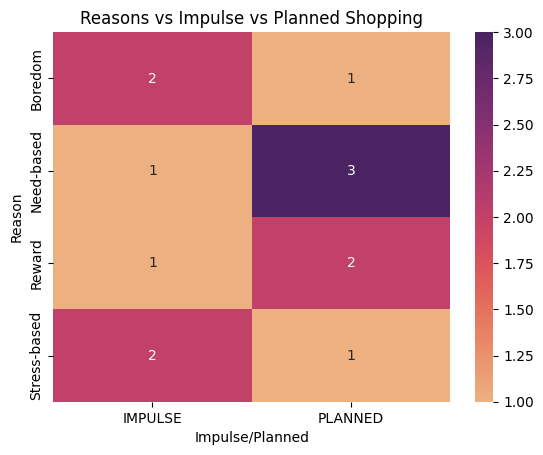

In [30]:
pivot = pd.crosstab(df["Reason"], df["Impulse/Planned"])
sns.heatmap(pivot, annot=True, fmt="d", cmap="flare")
plt.title("Reasons vs Impulse vs Planned Shopping")
plt.show()

Boredom and reward are dominant triggers for impulse shopping, while planned purchases are often driven by necessity or timing.

#Multi-variable Pairplot (Correlations Overview)

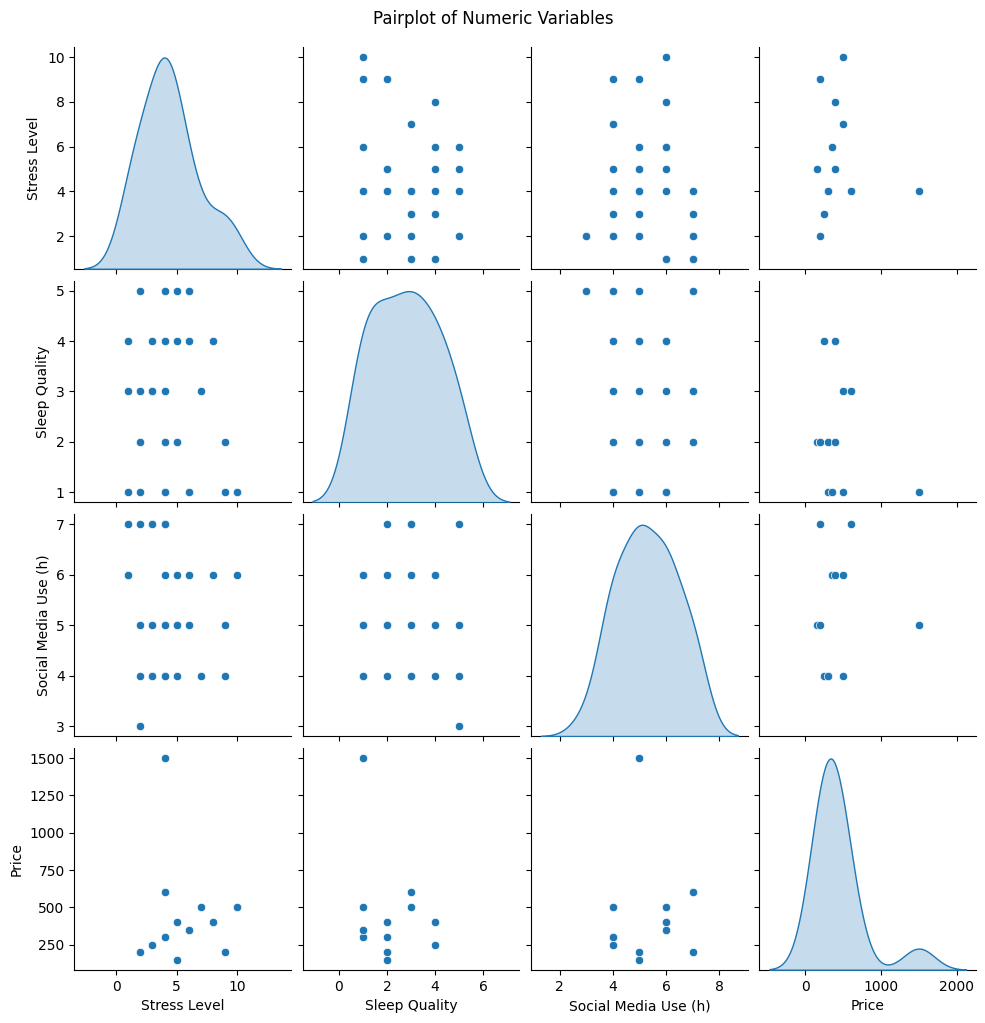

In [31]:
sns.pairplot(df[["Stress Level", "Sleep Quality", "Social Media Use (h)", "Price"]], diag_kind="kde")
plt.suptitle("Pairplot of Numeric Variables", y=1.02)
plt.show()

Reveals all pairwise trends, such as negative relationship between sleep & stress, or stress & price. Great for discovering subtle patterns.